In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow import keras
from matplotlib import pyplot as plt

In [16]:
df= pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
# Load the Pima Indians Diabetes dataset

X =  df.drop('Outcome',axis=1)
y = df['Outcome']

In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
''''
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
'''
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(500, activation='relu'),
     tf.keras.layers.Dense(200, activation='relu'),
     tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               4500      
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 50)                10050     
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 114801 (448.44 KB)
Trainable params: 114801 (448.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
# Train the model
history=model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
20/20 [==============================] - 1s 4ms/step - loss: 0.5518 - accuracy: 0.7329
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4658 - accuracy: 0.7785
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4292 - accuracy: 0.7932
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4202 - accuracy: 0.8013
Epoch 5/50
20/20 [==============================] - 0s 9ms/step - loss: 0.4116 - accuracy: 0.8094
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3968 - accuracy: 0.8192
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3942 - accuracy: 0.8127
Epoch 8/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3918 - accuracy: 0.8241
Epoch 9/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3826 - accuracy: 0.8241
Epoch 10/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3756 - accuracy: 0.8160
Epoch 11/50
20/20 [

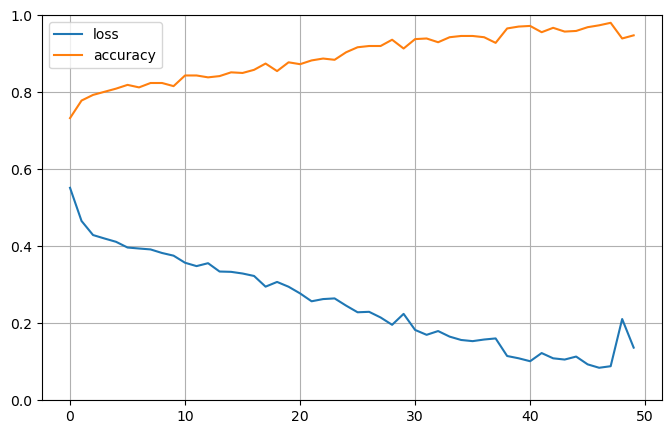

In [34]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_classes)
#print(f'Test accuracy: {accuracy:.4f}')


5/5 [==============================] - 0s 2ms/step


In [ ]:
accuracy

In [13]:
y_pred

array([[0.3712613 ],
       [0.1021957 ],
       [0.08757706],
       [0.29768553],
       [0.43329084],
       [0.54361963],
       [0.00749068],
       [0.56949013],
       [0.69617635],
       [0.5321094 ],
       [0.20456776],
       [0.82598245],
       [0.27985582],
       [0.51520973],
       [0.08527896],
       [0.36273316],
       [0.0874982 ],
       [0.04191976],
       [0.84265405],
       [0.636291  ],
       [0.31090543],
       [0.04749356],
       [0.47947973],
       [0.03029017],
       [0.59914213],
       [0.84920263],
       [0.11169672],
       [0.02155567],
       [0.10939041],
       [0.21722758],
       [0.95071024],
       [0.6005283 ],
       [0.90742403],
       [0.83512515],
       [0.5412669 ],
       [0.778014  ],
       [0.94901544],
       [0.41751248],
       [0.37699994],
       [0.8052652 ],
       [0.05131189],
       [0.43288994],
       [0.61323076],
       [0.3602834 ],
       [0.02566128],
       [0.5853705 ],
       [0.7223546 ],
       [0.225